## Premier League Fantasy Player Valuation Project
##### By: Eric Kim

**Objective:** To estimate fantasty prices for Premier League Players based on past performances and statistics such as goal involvment and defensive contributions, while identifying under and over valued players relative to their current market price.

### Initial Data Exploration

In [11]:
install.packages("tidyverse")
install.packages("glmnet")
install.packages("dplyr")
install.packages("patchwork")
install.packages("broom")
install.packages("plotly")
install.packages("car")
library(tidyverse)
library(glmnet)
library(dplyr)
library(patchwork)
library(broom)
library(car)


The downloaded binary packages are in
	/var/folders/dv/ydd5rn7x06j54qnztfm7w93m0000gn/T//RtmplHOfht/downloaded_packages

The downloaded binary packages are in
	/var/folders/dv/ydd5rn7x06j54qnztfm7w93m0000gn/T//RtmplHOfht/downloaded_packages

The downloaded binary packages are in
	/var/folders/dv/ydd5rn7x06j54qnztfm7w93m0000gn/T//RtmplHOfht/downloaded_packages

The downloaded binary packages are in
	/var/folders/dv/ydd5rn7x06j54qnztfm7w93m0000gn/T//RtmplHOfht/downloaded_packages

The downloaded binary packages are in
	/var/folders/dv/ydd5rn7x06j54qnztfm7w93m0000gn/T//RtmplHOfht/downloaded_packages

The downloaded binary packages are in
	/var/folders/dv/ydd5rn7x06j54qnztfm7w93m0000gn/T//RtmplHOfht/downloaded_packages


also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘cowplot’, ‘Deriv’, ‘forecast’, ‘microbenchmark’, ‘rbibutils’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’





The downloaded binary packages are in
	/var/folders/dv/ydd5rn7x06j54qnztfm7w93m0000gn/T//RtmplHOfht/downloaded_packages


Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




In [2]:
fpl_data <- read.csv("fpl_player_statistics.csv") |>
    select(player_name,
    position_name,
    now_cost,
    points_per_game,
    expected_goals_per_90,
    expected_assists_per_90,
    expected_goal_involvements_per_90,
    threat,
    creativity,
    influence,
    clean_sheets_per_90,
    defensive_contribution_per_90,
    saves_per_90,
    starts_per_90)

head(fpl_data)

,player_name,position_name,now_cost,points_per_game,expected_goals_per_90,expected_assists_per_90,expected_goal_involvements_per_90,threat,creativity,influence,clean_sheets_per_90,defensive_contribution_per_90,saves_per_90,starts_per_90
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Erling Haaland,FWD,15.0,8.9,0.99,0.07,1.06,889,116.3,772.2,0.55,3.51,0,1.05
2,Antoine Semenyo,MID,7.7,6.2,0.34,0.11,0.45,475,311.6,457.4,0.31,7.75,0,1.00
3,Bruno B.Fernandes,MID,9.4,5.8,0.43,0.25,0.68,331,741.2,599.0,0.06,10.56,0,1.04
4,Declan Rice,MID,7.1,5.7,0.11,0.22,0.33,163,512.8,423.6,0.51,10.86,0,1.01
5,Trevoh Chalobah,DEF,5.5,5.9,0.06,0.04,0.10,134,77.0,418.0,0.52,8.93,0,1.04
6,Marc Guéhi,DEF,5.3,5.8,0.08,0.09,0.17,151,126.4,406.8,0.38,8.19,0,1.00


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


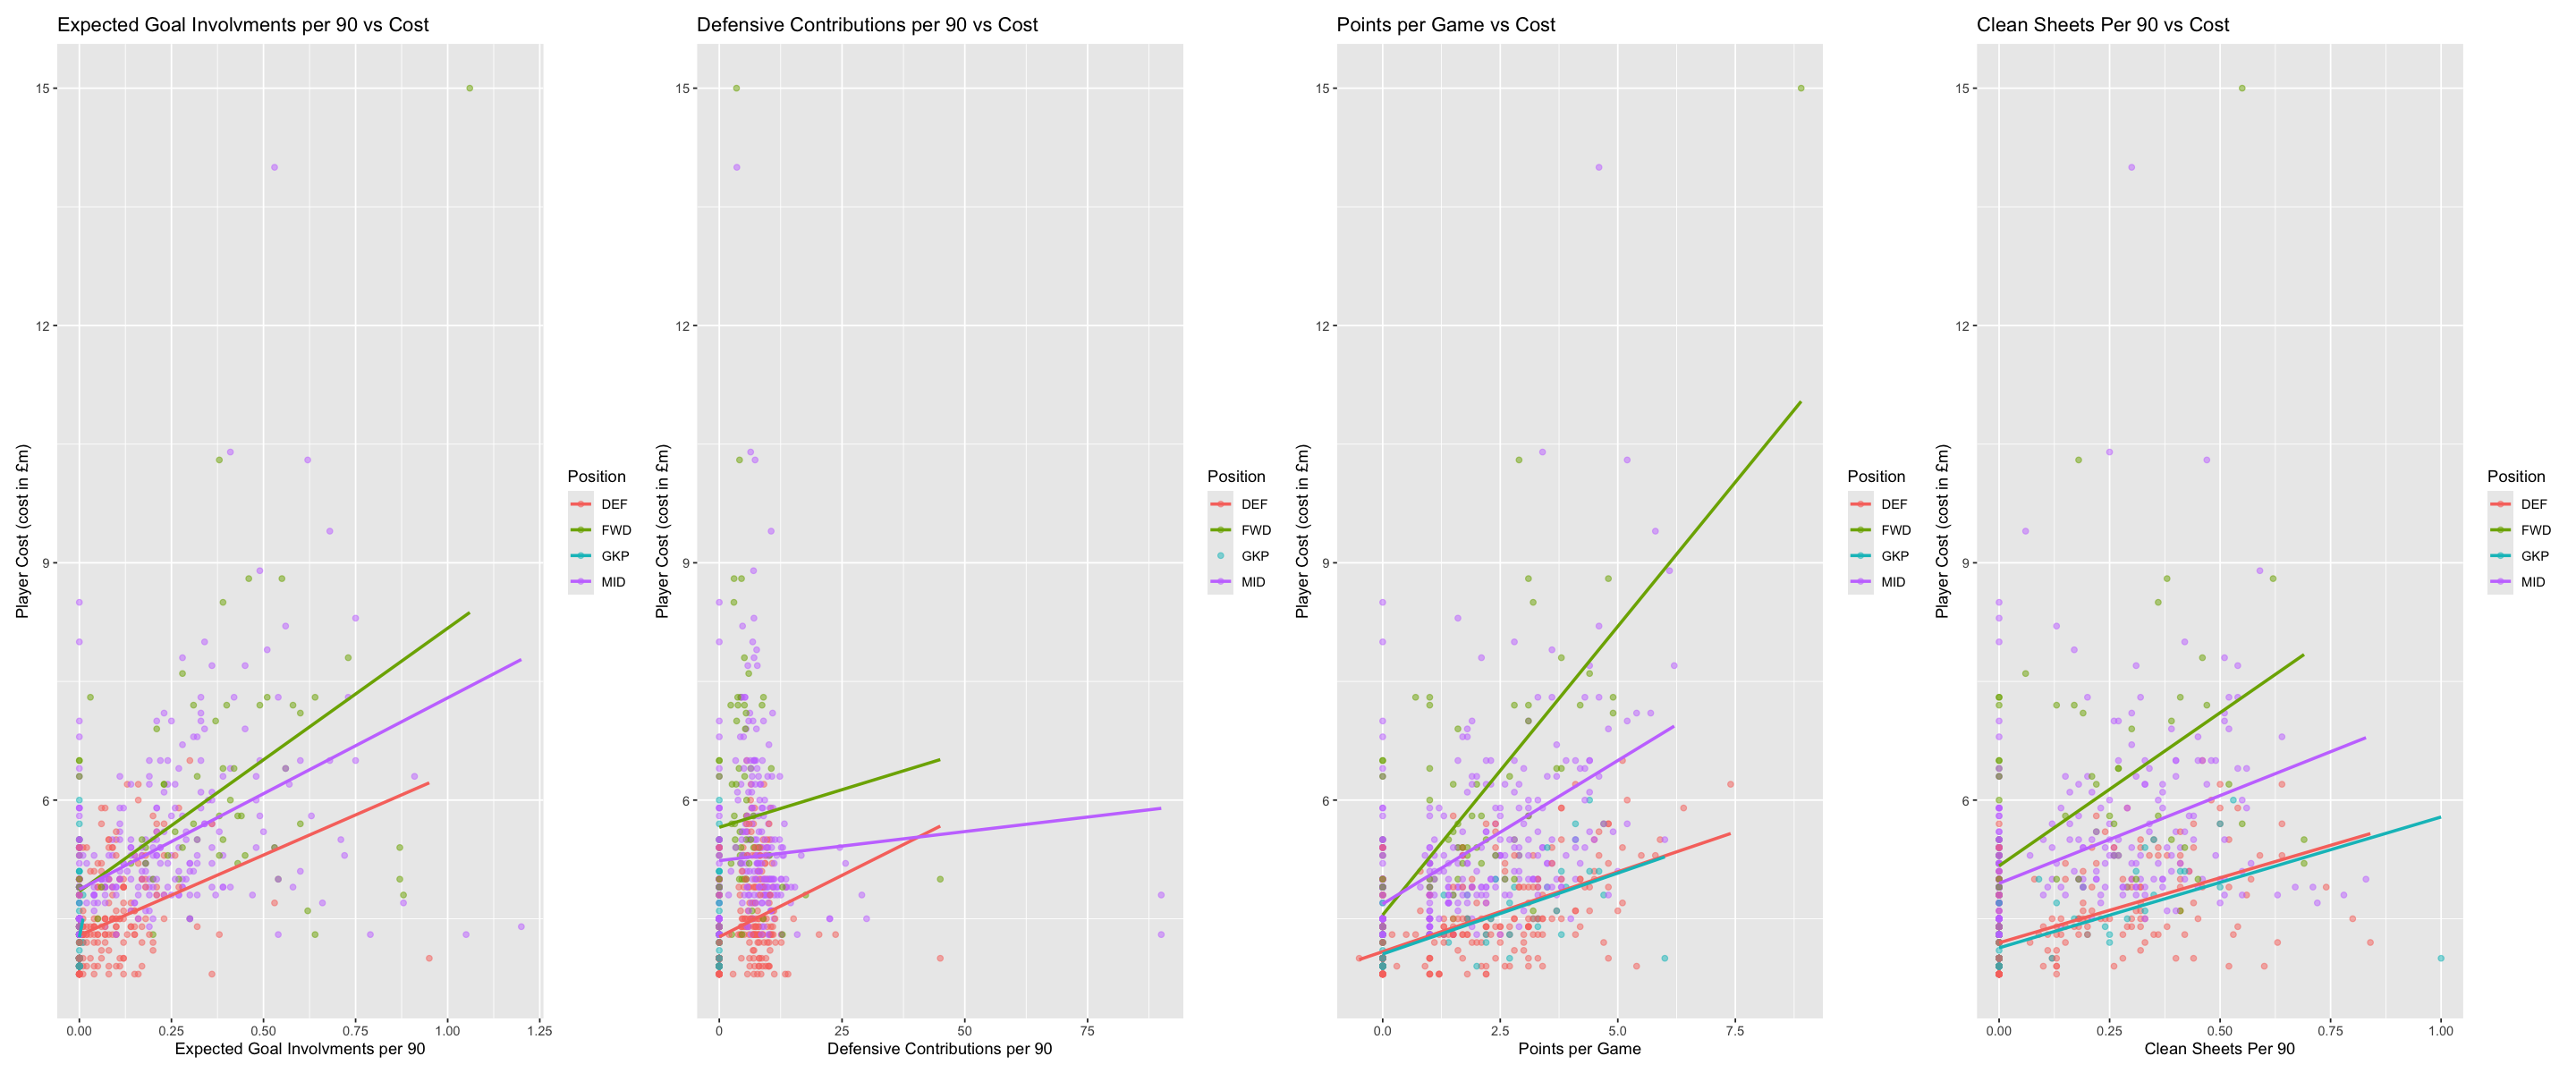

In [3]:
options(repr.plot.width = 24, repr.plot.height = 10)

expectedgoals_to_cost_plot <- fpl_data |>
    ggplot(aes(x = expected_goal_involvements_per_90, y = now_cost, color = position_name)) +
        geom_point(alpha = 0.5) +
         geom_smooth(se = FALSE, method = "lm") +
        labs(title = "Expected Goal Involvments per 90 vs Cost",
            x = "Expected Goal Involvments per 90",
            y = "Player Cost (cost in £m)",
            color = "Position")

defensive_contributions_to_cost_plot <- fpl_data |>
    ggplot(aes(x = defensive_contribution_per_90, y = now_cost, color = position_name)) +
        geom_point(alpha = 0.5) +
         geom_smooth(se = FALSE, method = "lm") +
        labs(title = "Defensive Contributions per 90 vs Cost",
            x = "Defensive Contributions per 90",
            y = "Player Cost (cost in £m)",
            color = "Position")



points_per_game_to_cost_plot <- fpl_data |>
    ggplot(aes(x = points_per_game, y = now_cost, color = position_name)) +
        geom_point(alpha = 0.5) +
         geom_smooth(se = FALSE, method = "lm") +
        labs(title = "Points per Game vs Cost",
            x = "Points per Game",
            y = "Player Cost (cost in £m)",
            color = "Position")

clean_sheets_to_cost_plot <- fpl_data |>
    ggplot(aes(x = clean_sheets_per_90, y = now_cost, color = position_name)) +
        geom_point(alpha = 0.5) +
         geom_smooth(se = FALSE, method = "lm") +
        labs(title = "Clean Sheets Per 90 vs Cost",
            x = "Clean Sheets Per 90",
            y = "Player Cost (cost in £m)",
            color = "Position")

expectedgoals_to_cost_plot | defensive_contributions_to_cost_plot | points_per_game_to_cost_plot | clean_sheets_to_cost_plot

#### Plot Analysis:

Expected Goal Invovlements per 90 vs Cost: We can observe a clear positive slope overall, with the slopes for forwards and midfielders being more steep than the slope for defenders. This suggests that pricing heavily weights goal contributions when assigning prices to midfielders and attackers.

Defensive Contributions per 90 vs Cost: From this plot, we can observe flat and weaker slopes for forwards and midfielders, with a steeper and more positive slope for defenders, suggesting that defensive conributions are a metric which are less relevant when it comes to pricing of players.

Points Per Game vs Cost: This plot shows a positive relation between points per game and cost, however this relationship must partly mechanical as the player costs are updated based on expected points, so one must be careful when using points per game as a predictor.

Clean Sheets Per 90 vs Cost: We can see a positive relation between clean sheets per 90 and cost, with a lot of data points at 0. This means that it is role contingent and is strongly associated towards valuation for goalkeepers and defenders rather than attackers and midfielders.

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


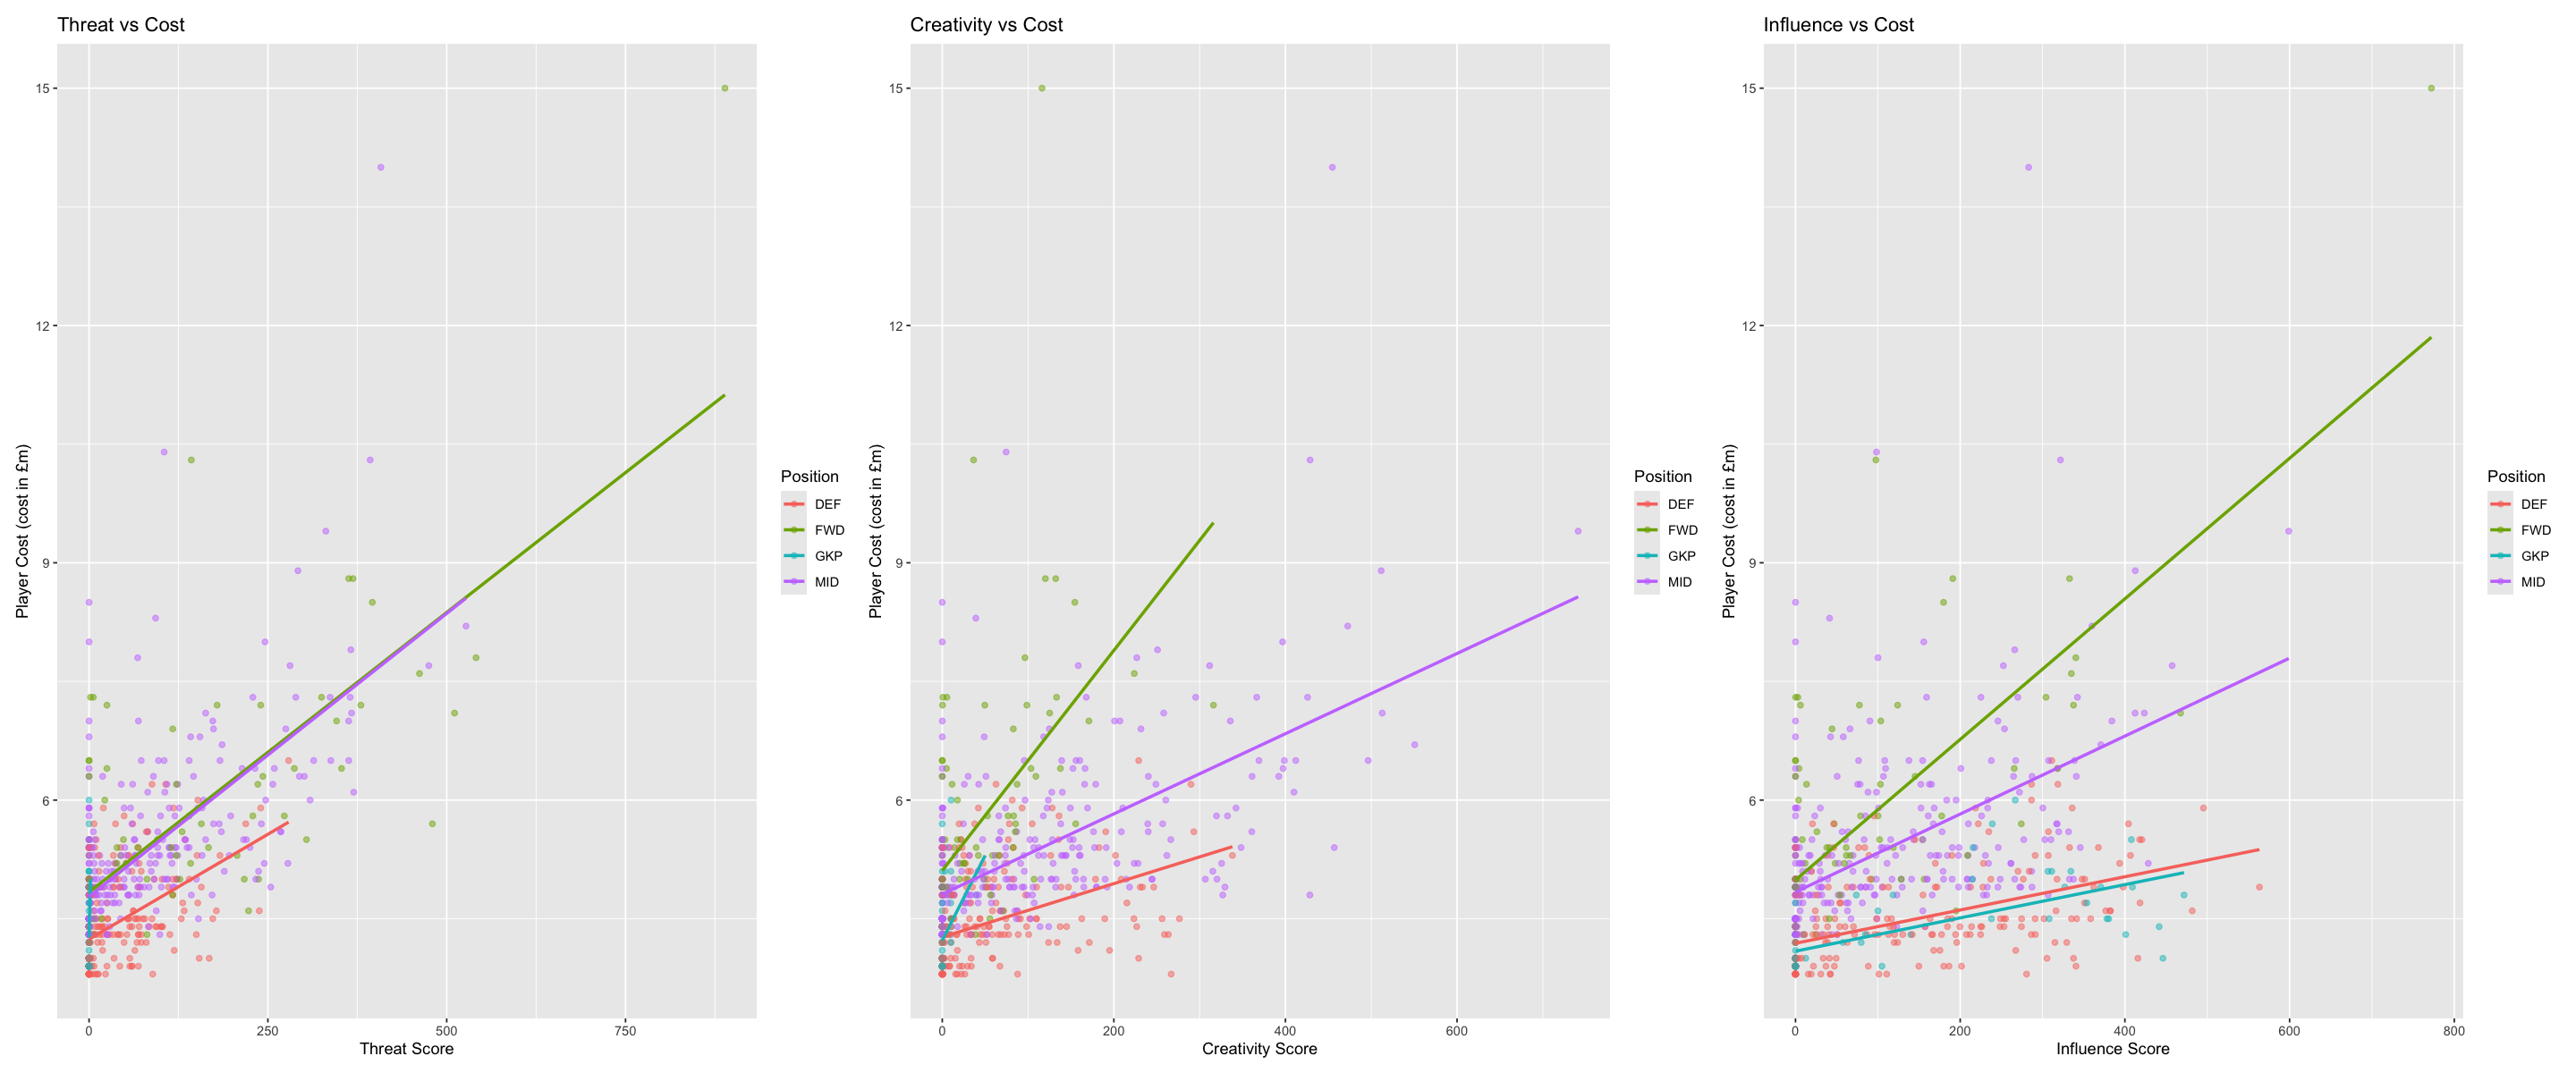

In [4]:
options(repr.plot.width = 24, repr.plot.height = 10)

threat_to_cost_plot <- fpl_data |>
    ggplot(aes(x = threat, y = now_cost, color = position_name)) +
        geom_point(alpha = 0.5) +
         geom_smooth(se = FALSE, method = "lm") +
        labs(title = "Threat vs Cost",
            x = "Threat Score",
            y = "Player Cost (cost in £m)",
            color = "Position")

creativity_to_cost_plot <- fpl_data |>
    ggplot(aes(x = creativity, y = now_cost, color = position_name)) +
        geom_point(alpha = 0.5) +
         geom_smooth(se = FALSE, method = "lm") +
        labs(title = "Creativity vs Cost",
            x = "Creativity Score",
            y = "Player Cost (cost in £m)",
            color = "Position")



influence_to_cost_plot <- fpl_data |>
    ggplot(aes(x = influence, y = now_cost, color = position_name)) +
        geom_point(alpha = 0.5) +
         geom_smooth(se = FALSE, method = "lm") +
        labs(title = "Influence vs Cost",
            x = "Influence Score",
            y = "Player Cost (cost in £m)",
            color = "Position")

threat_to_cost_plot | creativity_to_cost_plot | influence_to_cost_plot

#### Plot Analysis:

Threat vs Cost: Threat shows a strong positive association with cost for attacking positions, which suggests that it plays a big role when determining the value of forwards and midfielders. This relationship is weaker for defensive positions, which indicated the limited relevance of threat outside of attacking roles.

Creativity vs Cost: Creativity shows a positive, but nosy relationship with cost,especially for midfielders. Although players with high creativity seem to be more expensive, high dispersion indicates that it is not sufficient alone as a predictor.

Influence vs Cost: Influence shows a strong positive association with cost across all positions, representing that pricing of players will highly associated with overall match performance and impact. However influence as a metric may be a reflection of other variables that are embedded in player pricing.

### Linear Regression (Additive)

In [5]:
# Goalkeeper Data
gk_data <- fpl_data |>
    filter(position_name == "GKP")

# Defender Data
def_data <- fpl_data |>
    filter(position_name == "DEF")

# Forward and Midfielder Data
fwd_mid_data <- fpl_data |>
    filter(position_name == "FWD" | position_name == "MID")


GoalKeeper Model: clean_sheet_per_90, saves_per_90, starts_per_90 and the association to price. 

In [6]:
gk_model <- lm(formula = now_cost ~ clean_sheets_per_90 + saves_per_90 + starts_per_90, data = gk_data)
tidy(gk_model, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.05184617,0.04644176,87.2457496,3.450306e-84,3.95949164,4.1442007
clean_sheets_per_90,0.64972852,0.33457889,1.9419292,5.549736e-02,-0.01561828,1.3150753
saves_per_90,-0.05010255,0.09861287,-0.5080732,6.127337e-01,-0.24620506,0.1459999
starts_per_90,0.63178057,0.30692387,2.0584276,4.264822e-02,0.02142879,1.2421323


Interpretation: We can see that when all the covariates are equal to 0, the average price for goalkeepers is 4 million. Per every one clean sheet per 90, we see that it is associated with a 0.65 million price increase in price on average holding all other variables constant at any value. Although it is techincally not significant using a 5% significance level, it is on the border so it still may be significant. For saves per 90, we see that for every save per 90 increase, the price of goalkeepers decreases by 0.05 million holding all other variables constant at any value, and once again this result is not statistaclly significant as the p-value is less than 5%. However for starts per 90, we see that for every unit increase in starts per 90, the average goalkeeper value increases by 0.63 million holding all other variables constant at any value. This result is statistically significant and we reject the null hypothesis.

Summary: We see that the most significant result for goalkeepers is starts per 90, with clean sheets per 90 being borderline and saves per 90 being a negative association, from this info we can observe that FPL prices for goalkeepers are primarily based on security of minutes and the team's defensive strength rather than amount of saves made.

Defender Model: clean_sheets_per_90, defensive_contributions_per_90, goal_contributions_per_90, starts_per_90 and the association to price

In [7]:
def_model <- lm(formula = now_cost ~ clean_sheets_per_90 + defensive_contribution_per_90 + expected_goal_involvements_per_90 + starts_per_90, data = def_data)
tidy(def_model, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.126738763,0.045768846,90.1647972,1.117024e-192,4.03659709,4.21688043
clean_sheets_per_90,1.366562353,0.175846991,7.7713150,2.016440e-13,1.02023199,1.71289272
defensive_contribution_per_90,0.003095062,0.006558965,0.4718827,6.374221e-01,-0.00982281,0.01601293
expected_goal_involvements_per_90,0.828753773,0.324126088,2.5568870,1.115294e-02,0.19038796,1.46711958
starts_per_90,0.055825947,0.047502785,1.1752142,2.410271e-01,-0.03773071,0.14938261


Interpretation: We can see that when all covariates are 0, the average price for defenders is around 4.13 million. For every one clean sheet per 90, the price increases by 1.37 million holding all other variables constant at any value. This result is very sigificant as we can see from the p-value, which is very small. Thus we reject the null hypothesis and conclude that clean sheets per 90 is highly associated with price for defenders. Looking at defensive_contributions_per_90, we see that a one unit increase is associated with a 0.003 million increase in price holding all other variables constant at any value. This is not significant and we fail to reject the null hypothesis. Every one unit increase in expected goal involvements per 90 is associated with a increase of 0.83 million increase in value, holding all other variables constant at any value. This result is statistically significant and we conclude that it is associated with player value. This indicates that attacking defenders such as attacking fullbacks, or center backs with an aerial presence may have a premium in price. For every unit increase in starts_per_90 is associated with an increase of 0.056 million increase in player price holding all other variables constant at any value, which is not statistically significant and we fail to reject the null hypothesis.

Summary: We see that by far the most significant variable for defenders is clean sheets per 90, with expected goals per 90 also being significant, with defensive contributions and starts not being statistically associated with player price. Thus we can conlude that FPL prices for defenders are primarily based on clean sheets, as well goal contributions.


Forward & Midfilder Model: expected_goal_involvements_per_90, threat, starts_per_90 and the assoication to price

In [8]:
fwd_mid_model <- lm(formula = now_cost ~ expected_goal_involvements_per_90  + starts_per_90, data = fwd_mid_data)
tidy(fwd_mid_model, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.668921,0.07348648,63.534421,1.796731e-218,4.5244770,4.8133653
expected_goal_involvements_per_90,2.121563,0.25012469,8.482020,3.747453e-16,1.6299204,2.6132046
starts_per_90,0.574526,0.10657761,5.390681,1.169004e-07,0.3650383,0.7840136


Interpretation: We can see that the average price for forwards and midfielders is 4.67 when all covariates is 0, which is not practically useful but tells us a baseline. For every unit increase in expected goal involvements per 90, we see that the value increases by 2.12 million, holding all other variables constant at any value. This result is statistically significant using a 5% signficance level and we reject the null hypothesis. Looking at starts per 90, we see that a a unit increase is associated with a 0.57 million increase in price, which is significant as we also reject the null hypothesis.

Summary: From the results, we see that the most significant variable for attacking players is expected goal involvements, which aligns with the idea that scoring goals and assists netting the most points. However we also see that starts per 90 is also significant meaning that playing time stability is important for attackers and midfielders as well.


### Linear Regression (Interactive)

I will be creating an interactive model using the covariates threat, creativity and influence, with position also being used to observe the effect of these variables for different positions and the association to price. The VIF of these variables will also be checked as there may be multicollinearity with these variables.

In [14]:
fpl_data_scaled <- fpl_data |>
    mutate(threat_z = scale(threat),
        creativity_z = scale(creativity),
        influence_z = scale(influence))

int_model <- lm(formula = now_cost ~ (threat_z + creativity_z + influence_z) * position_name, data = fpl_data_scaled)
tidy(int_model, conf.int = TRUE)
vif(int_model)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),4.47530649,0.05984097,74.78666304,0.000000e+00,4.357831524,4.59278146
threat_z,0.21879735,0.14027673,1.55975519,1.192379e-01,-0.056582611,0.49417731
creativity_z,0.11512887,0.08543733,1.34752414,1.782168e-01,-0.052594818,0.28285256
influence_z,0.13135463,0.07628353,1.72192652,8.549350e-02,-0.018399043,0.28110831
position_nameFWD,0.80097060,0.18019066,4.44512823,1.010511e-05,0.447234816,1.15470639
position_nameGKP,13.48460906,20.54411865,0.65637321,5.117845e-01,-26.845948711,53.81516683
position_nameMID,0.60313907,0.07555504,7.98277724,5.339943e-15,0.454815503,0.75146264
threat_z:position_nameFWD,0.36860227,0.20880129,1.76532560,7.791432e-02,-0.041299599,0.77850413
threat_z:position_nameGKP,23.14887046,35.31496128,0.65549755,5.123477e-01,-46.178614951,92.47635588


there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif



,GVIF,Df,GVIF^(1/(2*Df))
threat_z,2.967254e+01,1,5.447251
creativity_z,1.100725e+01,1,3.317718
influence_z,8.774959e+00,1,2.962256
position_name,4.578928e+05,3,8.779315
threat_z:position_name,1.665247e+07,3,15.980111
creativity_z:position_name,3.340834e+03,3,3.866421
influence_z:position_name,1.824718e+02,3,2.381584


#### Interpretations:

From the results in the table, with DEF as the reference level, we see that the results that are statisically signficant are threat:MID, creativity:FWD, creativity:MID, and influence:MID. Thus we see that the underlying metrics and price is position dependent, especially for midfielders and forwards who exhibit substantially different pricing sensitivities compared to defenders and goalkeepers.

Multicollinearity is primarily concentrated in the threat and position interaction terms, which is expected in fully interactive models. The main effects are still within the acceptable threshold, suggesting that the coefficients for the core predictors are stable.

### Goodness of Fit

Global Interaction Model vs No Interaction Model

In [18]:
model_no_int <- lm(formula = now_cost ~ threat_z + creativity_z + influence_z + position_name, data = fpl_data_scaled)

anova(model_no_int, int_model)
glance(int_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,762,406.4273,NA,NA,NA,NA
2,753,383.5064,9,22.92083,5.000462,1.464795e-06


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.5831156,0.5748111,0.7136559,70.21708,8.259374e-132,15,-823.6538,1681.308,1760.274,383.5064,753,769


Model Comparison: From looking at the F-test from anova, we see that the p-value is very small, meaning that we reject the null hypothesis that coefficients for the added coeffients in the interactive model are all zero. The interaction model is a better fit than the non-interactive model justifying the decision to include interaction by position.

Model Fit: The interaction model explains 58% of the variation in player cost, which suggests a very strong fit overall given the cross-sectional nature of the data.

GK Full Model vs Reduced

In [ ]:
gk_reduced_model <- lm(formula = now_cost ~ clean_sheets_per_90 + starts_per_90, data = gk_data)

anova(gk_reduced_model, gk_model)
glance(gk_reduced_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,85,10.70798,NA,NA,NA,NA
2,84,10.67518,1,0.03280563,0.2581384,0.6127337


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.4672374,0.4547018,0.3549314,37.27286,2.386077e-12,2,-32.18731,72.37463,82.28398,10.70798,85,88


Model Comparison: Looking at the F-test, we were able to assess whether or not saves per 90 provided extra explanatory power when it comes to pricing for goalkeepers. The test failed, thus we failed to reject the null hypothesis indicating that saves per 90 do not significantly improve model fit, thus the reduced model was retained.

Model Fit: The reduced GK model explains 45% of the variation in player cost, indicating that clean sheets per 90 and starts per 90 alone almost explains half of the variation in price.

DEF Full Model vs Reduced

In [25]:
def_reduced_model <- lm(formula = now_cost ~ clean_sheets_per_90 + expected_goal_involvements_per_90, data = def_data)

anova(def_reduced_model, def_model)
glance(def_reduced_model)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,252,54.94495,NA,NA,NA,NA
2,250,54.50180,2,0.4431445,1.016353,0.3634029


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0.3380846,0.3328313,0.4669427,64.35666,2.637006e-23,2,-166.1255,340.251,354.4161,54.94495,252,255


Model Comparison: Looking at the F-test, we were able to assess whether defensive contributions per 90 and starts per 90 provide extra explanatory power when it comes to pricing for defenders. The test failed meaning we fail to reject the null hypothesis indicating that defensive contributions per 90 and starts per 90 do not significantly improve model fit, meaning we retained the reduced model.

Model Fit: Looking at the adjusted R-squared, we see that 33% of the variation in defender price was explained by the reduced model, meaning that clean sheets per 90 and expected goal involvements per 90 alone explain 33% of the variance, indicating that defender price is mainly driven by clean sheets and attacking contributions.